In [2]:
import networkx as nx
G = nx.Graph()

In [4]:
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

H = nx.path_graph(10)
G.add_nodes_from(H)
G.add_node(H)

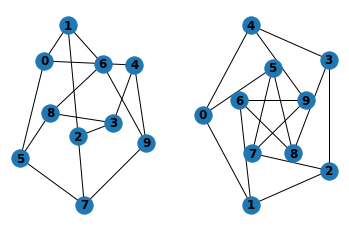

In [5]:
import matplotlib.pyplot as plt
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [6]:
from libpysal import weights
import matplotlib.pyplot as plt
import networkx as nx
import geopandas
import numpy as np

# read in example data from geojson. GeoJSON is a file format
# for encoding geographic data based on JSON. It is useful for
# presenting geographic data on the web, and is increasingly
# used as a file format for geographic data.
filepath = "nuts1.geojson"
european_regions = geopandas.read_file(filepath)

# extract the centroids for connecting the regions, which is
# the average of the coordinates that define the polygon's boundary
centroids = np.column_stack((european_regions.centroid.x, european_regions.centroid.y))

# construct the "Queen" adjacency graph. In geographical applications,
# the "Queen" adjacency graph considers two polygons as connected if
# they share a single point on their boundary. This is an analogue to
# the "Moore" neighborhood nine surrounding cells in a regular grid.
queen = weights.Queen.from_dataframe(european_regions)

# Then, we can convert the graph to networkx object using the
# .to_networkx() method.
graph = queen.to_networkx()

# To plot with networkx, we need to merge the nodes back to
# their positions in order to plot in networkx
positions = dict(zip(graph.nodes, centroids))

# plot with a nice basemap
ax = european_regions.plot(linewidth=1, edgecolor="grey", facecolor="lightblue")
ax.axis([-12, 45, 33, 66])
ax.axis("off")
nx.draw(graph, positions, ax=ax, node_size=5, node_color="r")
plt.show()

# An alternative method to construct graphs from polygons may use
# pygeos. This package is a high-performance interface to the GEOS C
# library, used in computing geographical relationships. These let us
# describe the relationships between "point sets," like polygons whether
# or not a line "crosses" a polygon, or whether two polygons "touch."
# These relationships, called "predicates", are extensive, and are documented
# by the pygeos package.

ModuleNotFoundError: No module named 'libpysal'